In [1]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
company_data = pd.read_csv('Company_Data.csv')
company_data.sample(5)

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
296   8.21        127      44           13         160    123      Good   63   
325  11.70        144      69           11         131    104    Medium   47   
264   6.95        128      29            5         324    159      Good   31   
222   7.49        136     119            6         178    145    Medium   35   
247   5.04        123     114            0         298    151       Bad   34   

     Education Urban   US  
296         18   Yes  Yes  
325         11   Yes  Yes  
264         15   Yes  Yes  
222         13   Yes  Yes  
247         16   Yes   No

In [3]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company_data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

<Figure size 1080x1080 with 0 Axes>

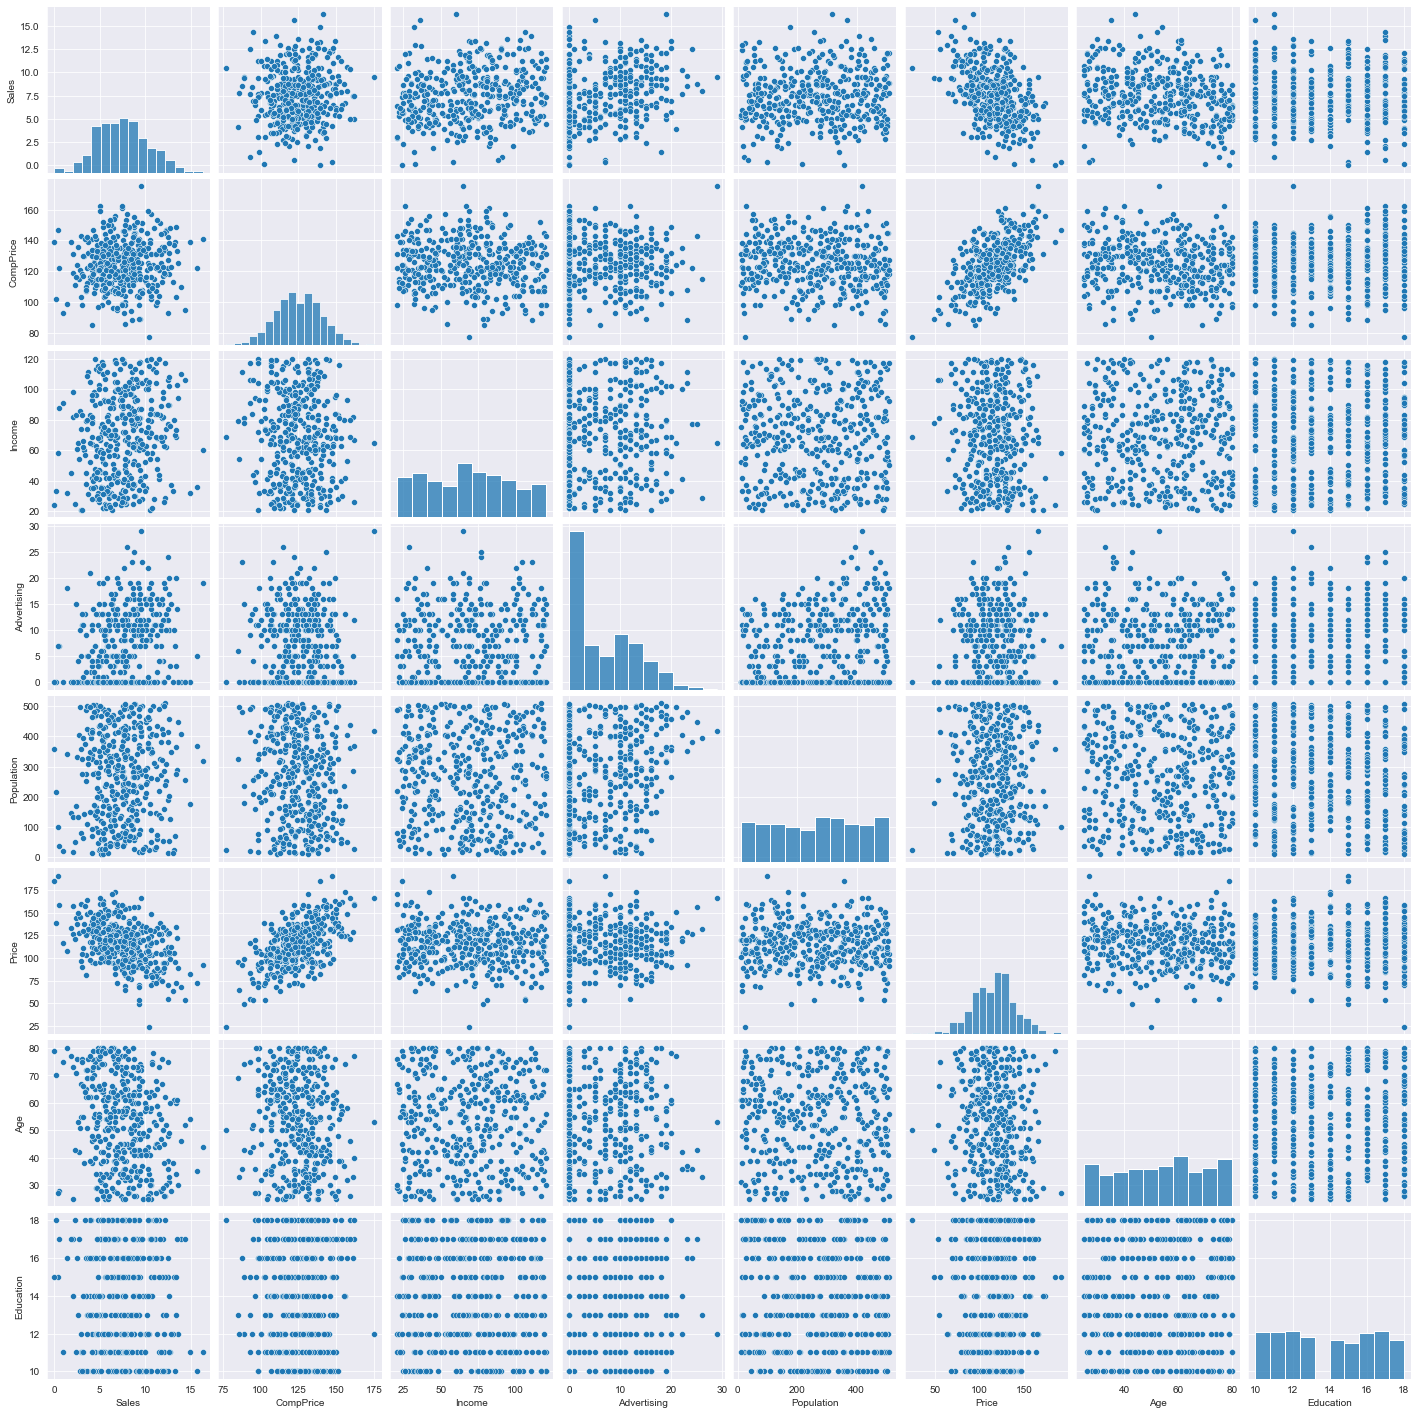

In [5]:
# visualizing the data
import seaborn as sns
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
sns.pairplot(company_data)
plt.show()

<AxesSubplot:>

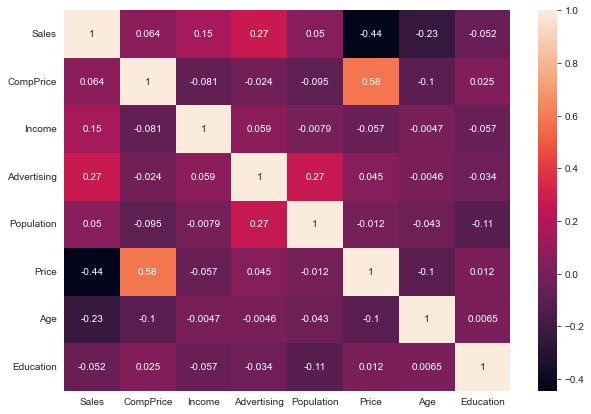

In [6]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(company_data.corr(),annot=True)

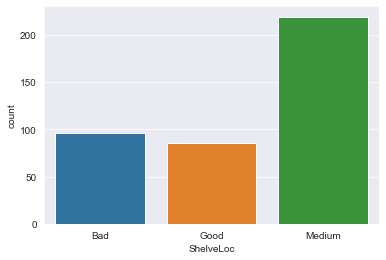

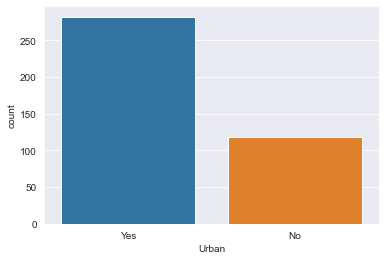

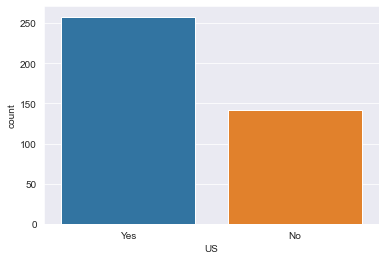

In [7]:
# checking count of categories for categorical columns colums
sns.countplot(company_data['ShelveLoc'])
plt.show()

sns.countplot(company_data['Urban'])
plt.show()

sns.countplot(company_data['US'])
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Density'>

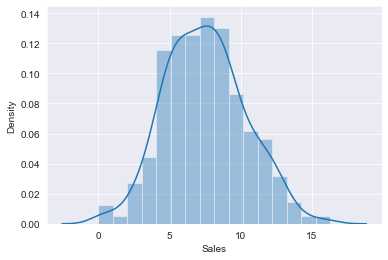

In [8]:
sns.distplot(company_data['Sales'])

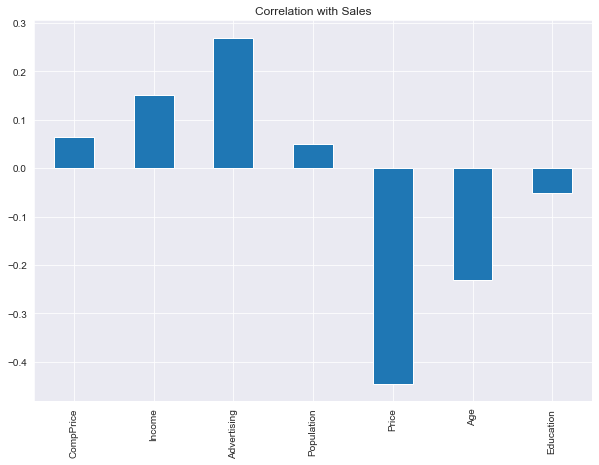

In [9]:
# Finding correlation with only Sales
company_data_copy = company_data.iloc[:,1:]
correlations = company_data_copy.corrwith(company_data['Sales'])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (10, 7), fontsize = 10)
plt.title('Correlation with Sales')
plt.show()

##### Sales are majorly depending on the attribute 'Advertisement'

In [10]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
company_data['Sales'] = pd.cut(x=company_data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'],right=False)
company_data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

<AxesSubplot:xlabel='Sales', ylabel='count'>

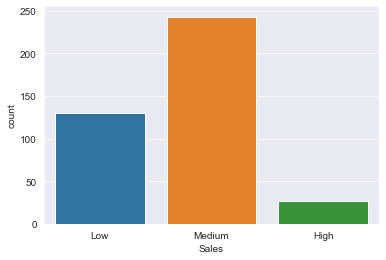

In [11]:
sns.countplot(company_data['Sales'])

In [12]:
company_data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [13]:
company_data.sample(5)

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
1    Medium        111      48           16         260     83      Good   65   
79   Medium        134      67            0         286     90       Bad   41   
317  Medium        142      30            0         472    136      Good   80   
397  Medium        162      26           12         368    159    Medium   40   
217     Low        106      44            0         481    111    Medium   70   

     Education Urban   US  
1           10   Yes  Yes  
79          13   Yes   No  
317         15    No   No  
397         18   Yes  Yes  
217         14    No   No

##### All of them are converted into categorical data 

In [14]:
# Converting other features into categorical data

company_data['CompPrice'] = pd.cut(x=company_data['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)

company_data['Income'] = pd.cut(x=company_data['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

company_data['Advertising'] = pd.cut(x=company_data['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

company_data['Population'] = pd.cut(x=company_data['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

company_data['Price'] = pd.cut(x=company_data['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

company_data['Age'] = pd.cut(x=company_data['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

company_data['Education'] = pd.cut(x=company_data['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

#### Though DT can be performed on both Numerical and Categorical, here we convert all the features into Categorical as we have some feature values in categorical and numerical and this may affect our prediction.

In [15]:
company_data.sample(5)

Sales CompPrice Income Advertising Population   Price ShelveLoc     Age  \
232    High      High   High      Medium        Low  Medium      Good    High   
177  Medium      High   High         Low        Low  Medium    Medium     Low   
195     Low    Medium   High         Low       High  Medium       Bad    High   
365  Medium      High    Low         Low        Low    High    Medium  Medium   
251     Low      High   High         Low     Medium  Medium       Bad    High   

    Education Urban   US  
232      High   Yes  Yes  
177      High   Yes  Yes  
195       Low   Yes  Yes  
365      High    No   No  
251    Medium   Yes  Yes

##### One Hot Encoding

In [16]:
# from pandas use get_dummies OR 
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(handle_unknown='ignore')
# company_data['Sales'] = ohe.fit_transform(company_data[['Sales']])
# company_data.sample(5)

##### Label Encoder - to convert text to numerical values

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
company_data['Sales'] = label_encoder.fit_transform(company_data['Sales'])
company_data['CompPrice'] = label_encoder.fit_transform(company_data['CompPrice'])
company_data['Income'] = label_encoder.fit_transform(company_data['Income'])
company_data['Advertising'] = label_encoder.fit_transform(company_data['Advertising'])
company_data['Population'] = label_encoder.fit_transform(company_data['Population'])
company_data['Price'] = label_encoder.fit_transform(company_data['Price'])
company_data['ShelveLoc'] = label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Age'] = label_encoder.fit_transform(company_data['Age'])
company_data['Education'] = label_encoder.fit_transform(company_data['Education'])
company_data['Urban'] = label_encoder.fit_transform(company_data['Urban'])
company_data['US'] = label_encoder.fit_transform(company_data['US'])
company_data.sample(5)

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
334      2          1       0            1           0      2          0    1   
259      1          2       1            2           0      2          0    0   
335      2          2       2            2           0      2          2    0   
343      1          2       1            2           0      2          0    1   
96       2          0       1            2           0      2          1    0   

     Education  Urban  US  
334          2      1   1  
259          1      0   1  
335          0      1   1  
343          2      1   1  
96           0      0   1

### Preparing data for Model Building

In [18]:
# Dividing data into input and output variables
x = company_data.iloc[:,1:]
y = company_data['Sales']
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0            0       0            2           2      2          0    1   
1            2       2            2           2      2          1    0   
2            2       1            2           2      2          2    2   
3            2       0            1           0      2          2    2   
4            0       2            1           0      2          0    1   
..         ...     ...          ...         ...    ...        ...  ...   
395          0       0            2           2      2          1    1   
396          0       1            1           1      2          2    2   
397          0       1            2           0      0          2    1   
398          2       0            1           2      2          0    2   
399          0       1            1           1      2          1    2   

     Education  Urban  US  
0            0      1   1  
1            1      1   1  
2            1      1   1  
3            2      1   1  
4            2      1   0  
..         ...    ...  ..  
395          2      1   1  
396          1      0   1  
397          0      1   1  
398          1      1   1  
399          0      1   1  

[400 rows x 10 columns]

In [19]:
#splitting data into Training-Testing data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state=20)

In [20]:
x_train

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
344          0       0            1           1      2          1    0   
396          0       1            1           1      2          2    2   
216          0       1            1           2      0          2    1   
323          2       0            2           0      2          2    1   
337          2       1            1           2      2          2    0   
..         ...     ...          ...         ...    ...        ...  ...   
393          2       2            2           1      2          2    1   
218          0       2            2           1      2          2    1   
223          2       1            1           2      2          2    0   
271          2       2            1           0      2          2    0   
355          2       0            1           2      0          1    1   

     Education  Urban  US  
344          2      0   1  
396          1      0   1  
216          0      1   0  
323          1      1   1  
337          0      1   0  
..         ...    ...  ..  
393          0      0   1  
218          2      1   1  
223          2      1   1  
271          0      1   0  
355          1      1   0  

[268 rows x 10 columns]

In [21]:
x_test

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
10           2       0            1           1      2          0    1   
382          2       1            2           2      2          2    0   
374          2       2            1           1      2          2    2   
196          2       1            1           0      2          0    0   
47           2       0            1           2      2          0    2   
..         ...     ...          ...         ...    ...        ...  ...   
179          0       1            1           1      2          2    0   
171          1       0            2           0      1          2    0   
387          0       0            2           2      2          2    0   
204          0       0            1           2      2          2    1   
122          2       0            1           1      2          2    0   

     Education  Urban  US  
10           1      0   1  
382          2      1   1  
374          1      1   1  
196          0      1   1  
47           0      1   0  
..         ...    ...  ..  
179          0      1   1  
171          0      1   1  
387          2      0   1  
204          2      1   0  
122          1      1   1  

[132 rows x 10 columns]

In [22]:
y_test.value_counts()

2    76
1    46
0    10
Name: Sales, dtype: int64

In [23]:
y_train.value_counts()

2    167
1     84
0     17
Name: Sales, dtype: int64

### Model Building using Decison Tree

In [41]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth= 6)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

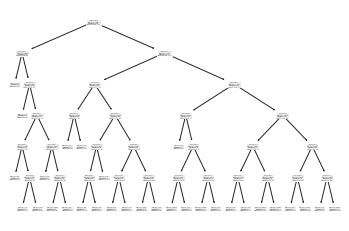

In [42]:
# Plotting Decision tree

from sklearn import tree
tree.plot_tree(model);



In [35]:
company_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [49]:
features_name = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
class_name = ['Low','Medium','High']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize = (20,20), dpi=1000)
tree.plot_tree(model,feature_names = features_name,class_names=class_name,filled = True);

In [50]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    92
1    37
0     3
dtype: int64

In [51]:
y_test.value_counts()

2    76
1    46
0    10
Name: Sales, dtype: int64

In [52]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds) 

col_0  0   1   2
Sales           
0      1   0   9
1      0  28  18
2      2   9  65

In [53]:
# Checking accuracy of model
model.score(x_test, y_test)
#np.mean(preds==y_test)

0.7121212121212122

### Building Decision Tree Classifier (CART) using Gini Criteria

In [54]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [55]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

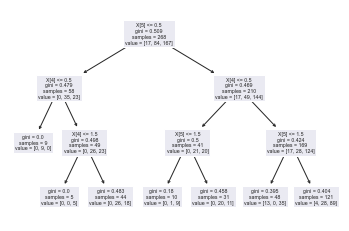

In [56]:
# Plotting Decision tree
tree.plot_tree(model_gini);

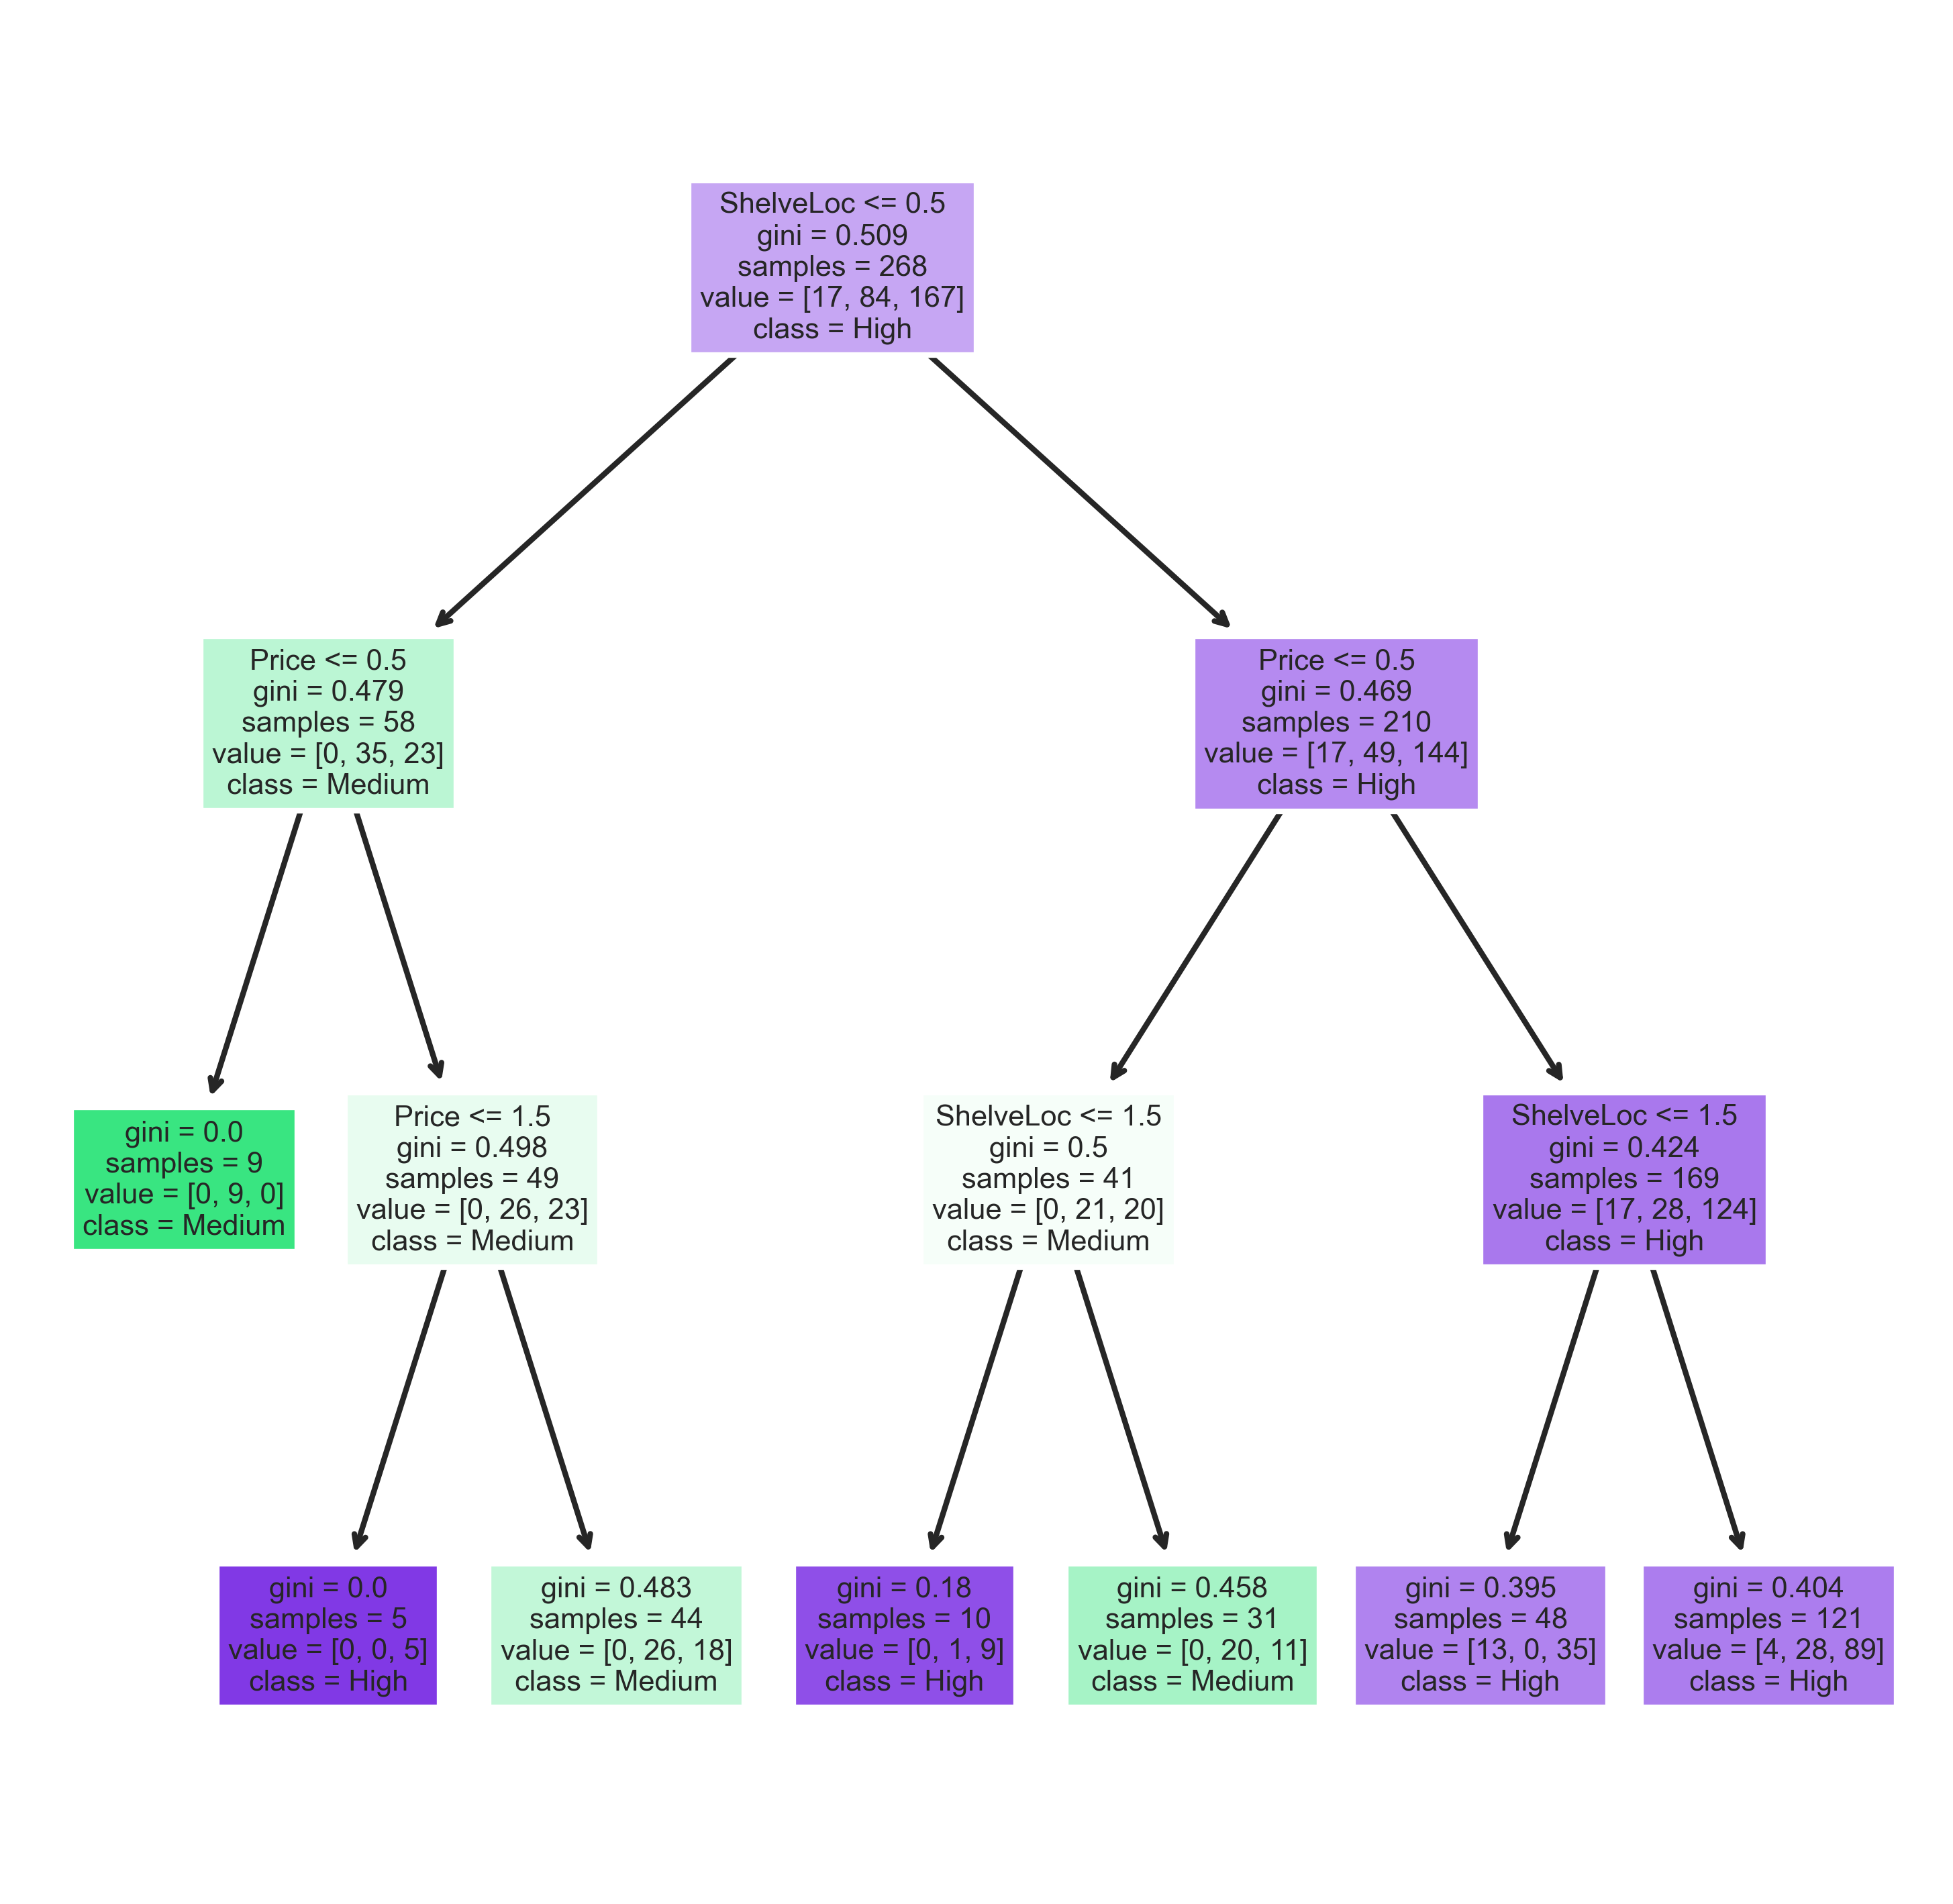

In [58]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [59]:
# Predicting Data
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

2    88
1    44
dtype: int64

In [60]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0   1   2
Sales        
0       0  10
1      30  16
2      14  62

In [61]:
# Checking accuracy of model
#model.score(x_test, y_test)
np.mean(preds==y_test)

0.696969696969697

##### Hence we got 71% accuracy using Tree height = 6  and for Tree height = 3 we got 70% Accuracy